In [360]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
from google.colab import drive

In [361]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
df= pd.read_csv('/content/drive/My Drive/insurance.csv')
print(df.dtypes)
print('\nNumber of rows and columns in the data set: ',df.shape)
df

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [363]:
# desribe the dataset (Exploratory data analysis) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [364]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [365]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [366]:
#Check for missing value
print(df.isnull())
print(df.isnull().sum())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


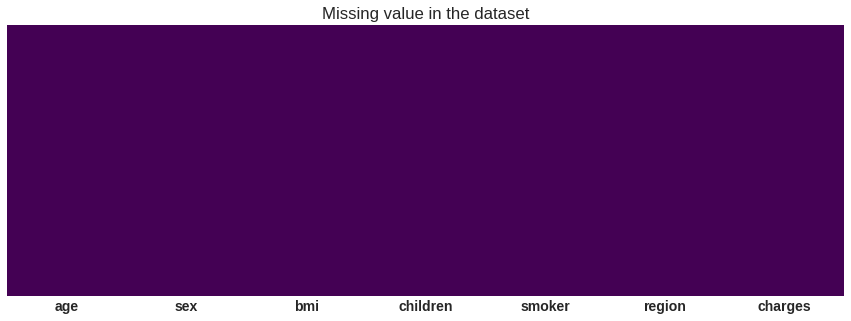

In [367]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

Correlation plot without label encoding

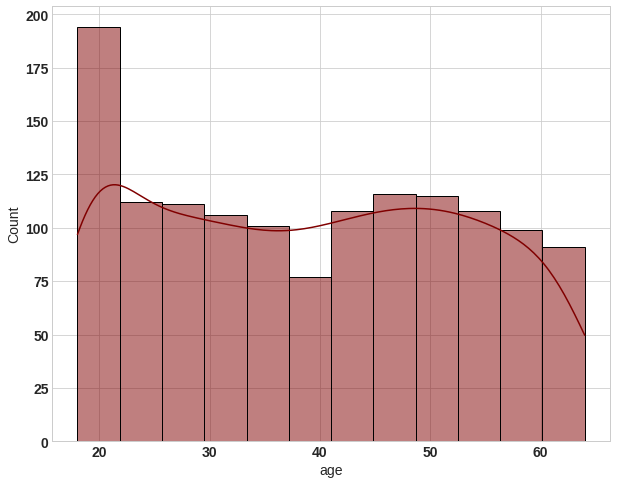

In [368]:
sns.histplot(df['age'],fill=True, color='maroon',kde=True)

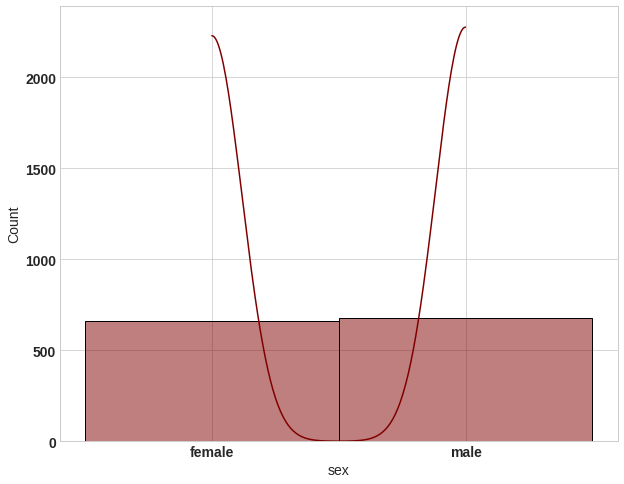

In [369]:
sns.histplot(df['sex'],fill=True, color='maroon',kde=True)

In [ ]:
sns.kdeplot(df['bmi'],bw=1,color='maroon',fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


In [ ]:
sns.histplot(df['children'],fill=True, color='maroon',kde=True)

In [ ]:
sns.histplot(df['smoker'],fill=True, color='maroon',kde=True)

In [ ]:
sns.histplot(df['region'],fill=True, color='maroon',kde=True)

In [ ]:
# correlation plot
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()

In [ ]:
#Plot the distribution of the dependent variable
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.histplot(df['charges'], kde=True, color='maroon')
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
ax.set_title('Distribution of insurance charges in $log$ sacle')
sns.histplot(df['charges'], kde=True, log_scale=True,color='maroon')

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [ ]:
# Log transform of dependent variable
from sklearn.preprocessing import LabelEncoder  
enc = LabelEncoder()    
df['sex'] = enc.fit_transform(df['sex'])
df['smoker'] = enc.fit_transform(df['smoker'])
df['region'] = enc.fit_transform(df['region'])
print(df)

In [ ]:
df['log_charges'] = np.log(df['charges'])
print(df)
sns.histplot(df['log_charges'], fill=True, kde=True,color='maroon')

In [ ]:
df.skew(axis = 0, skipna = True)

Correlation plot with label encoding

In [ ]:
# correlation plot
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix,annot=True,  cmap='gnuplot_r',square=True)
plt.show()

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
df['X0'] = [1 for i in range(df.shape[0])]
X = df.drop(['charges', 'log_charges'], axis=1)
Y = df['log_charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, shuffle=True, random_state=42)
print(X)
print(Y)

#Model building

In [ ]:
# Step 1: add x0 =1 to dataset



# Step2: build model
XT=np.transpose(X_train)
XTX=XT.dot(X_train)
inv=np.linalg.inv(XTX)
inv_XT=inv.dot(XT)
theta=inv_XT.dot(Y_train)


# The parameters for linear regression model
print("Parameter using linear regression equation:\n",theta)
intercept=theta[len(theta)-1]
# slope=theta[1]
print("Intercept: ",intercept)
# print("slope: ",slope)

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
# reg.predict()

#Parameter
print("Parameter using sklearn library:\n",reg.coef_)
print("intercept:",reg.intercept_)
print("Score:",reg.score(X_train, Y_train))

#Model evaluation

In [ ]:
# prediction
# import math
A=X_test.to_numpy()
B=Y_test.to_numpy()
# Y_test=Y_test.to_numpy()
Y_pred = A.dot(theta)
print("Prediction from model using linear regression equation: \n")
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(data)
# print(Y_test)
errorList=[]
for i in range(len(Y_pred)):
  error=pow((B[i]-Y_pred[i]),2)
  errorList.append(error)

#Evaluvation: MSE (Write your MSE equation from scratch)
J_mse = sum(errorList)/len(Y_pred)
rmse=np.sqrt(J_mse)
# print(J_mse)


In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('Root Mean Squared Error:', rmse)

In [ ]:
# sklearn regression module
from sklearn.metrics import mean_squared_error
# from sklearn import metrics
y_pred_sk = reg.predict(X_test)
# print(y_pred_sk)
data1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_sk})
print("Prediction from linear regression model using the sklearn library: \n")
print(data1)
#Evaluvation: MSE
J_mse_sk = metrics.mean_squared_error(B, y_pred_sk)
rmse = np.sqrt(J_mse_sk)

In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('Root Mean Squared Error:', rmse)

In [ ]:

# Check for Linearity
f = plt.figure(figsize=(20,7))
ax = f.add_subplot(121)
sns.scatterplot(x=Y_test, y=Y_pred, ci=None, color="maroon", label="Point")
# sns.lineplot(x=Y_test, y=Y_pred, ci=None, color="blue", label="Point")
plt.title("Model using linear regression equation Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Check for Linearity
f = plt.figure(figsize=(20,7))
ax = f.add_subplot(121)
sns.scatterplot(x=Y_test, y=y_pred_sk, ci=None, color="maroon", label="Point")
plt.title("Linear regression model using the sklearn library")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
for i,j in enumerate(X.columns):
  model=LinearRegression()
  model.fit(X[j].values[:,np.newaxis], Y.values)
  predd=model.predict(X[j].values[:,np.newaxis])
  plt.title("Best fit line")
  plt.xlabel(str(j))
  plt.ylabel('Charges')
  plt.scatter(X[j].values[:,np.newaxis], Y,color='maroon', s=20)
  # sns.scatterplot(x=X[j].values[:,np.newaxis],y= Y, color="maroon")
  plt.plot(X[j].values[:,np.newaxis], predd ,color='blue')
  plt.show()

References:


https://datatofish.com/correlation-matrix-pandas/

https://www.geeksforgeeks.org/python-pandas-dataframe-skew/

https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

https://stackoverflow.com/questions/49347878/normal-equation-for-linear-regression

https://medium.com/@shuklapratik22/implementation-of-simple-linear-regression-using-normal-equation-matrices-f9021c3590da

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html